In [40]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
# Load the dataset
df = pd.read_csv('customer_churn.csv')
# Initial data exploration
print(df.head())
#Examining the structure of the dataset
print(df.info())
#Checking for missing values
print(df.isna().sum())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [23]:
#Dropping the RowNumber,CustomerId and Suname column as it is not useful for analysis
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

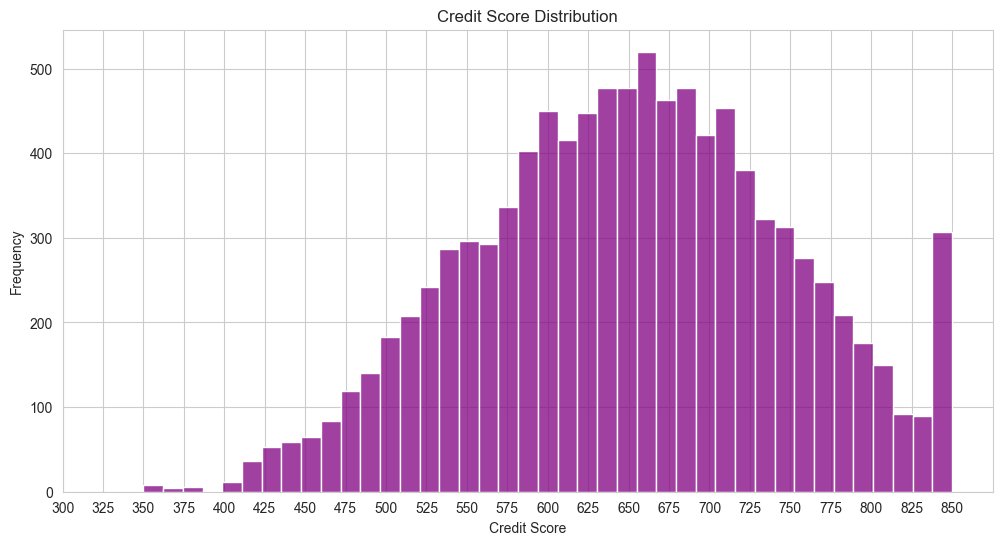

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


In [24]:
#Visualization of numerical features
#credit score distribution
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(df['CreditScore'], color='purple')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.xticks(np.arange(300, 875, 25))
plt.ylabel('Frequency')
plt.show()
print(df['CreditScore'].describe())


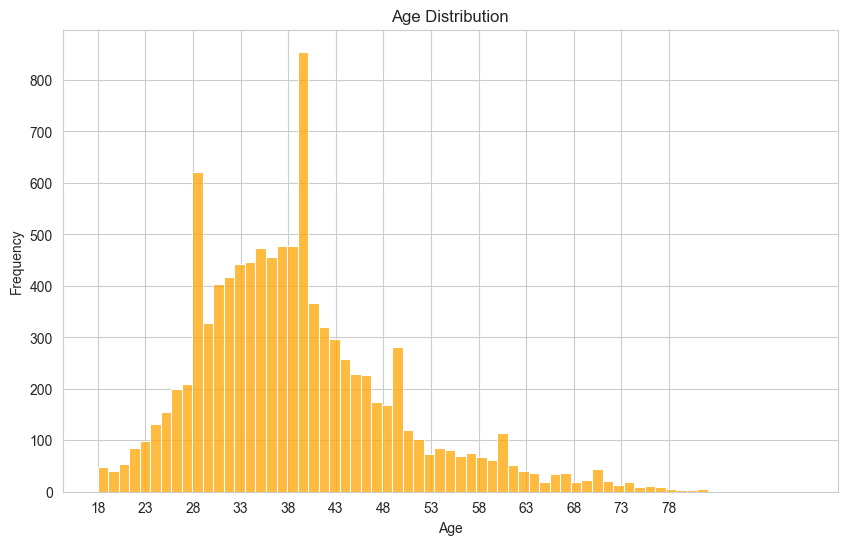

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


In [25]:
#age distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'],color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.xticks(np.arange(18, 80, 5))
plt.ylabel('Frequency')
plt.show()
print(df['Age'].describe())


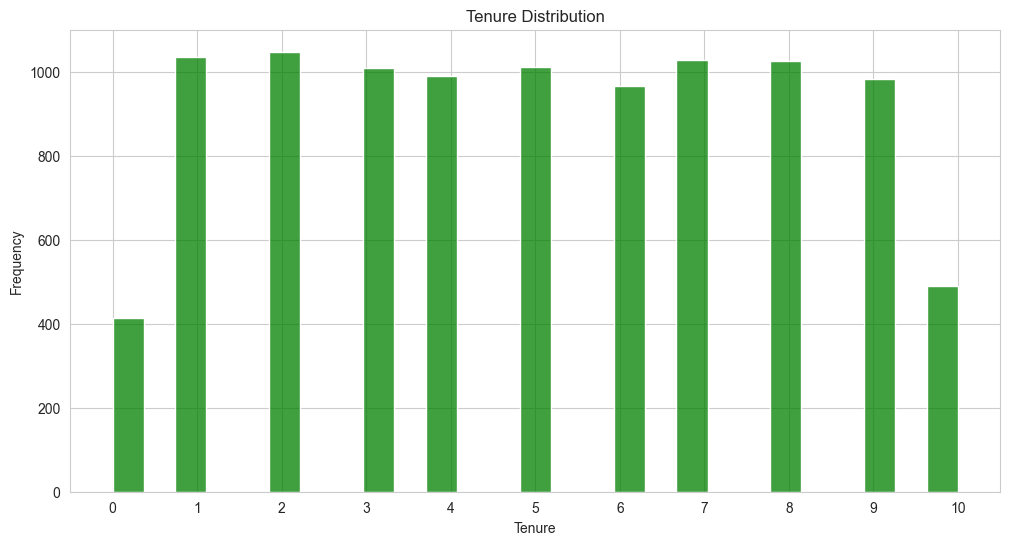

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


In [26]:
#Tenure distribution
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(df['Tenure'], color='green')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.xticks(np.arange(0, 11, 1))
plt.ylabel('Frequency')
plt.show()
print(df['Tenure'].describe())

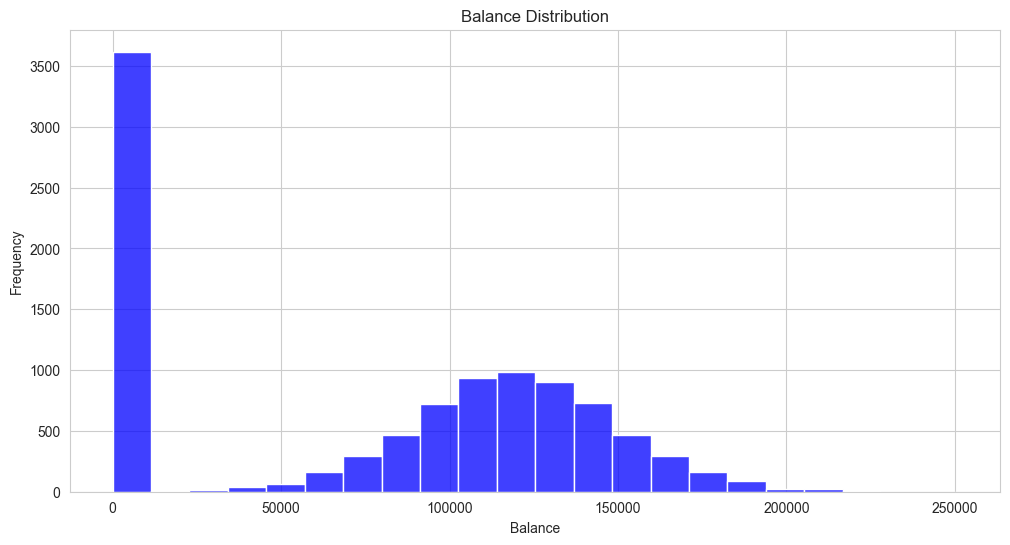

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


In [27]:
#Tenure distribution
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(df['Balance'], color='blue')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()
print(df['Balance'].describe())

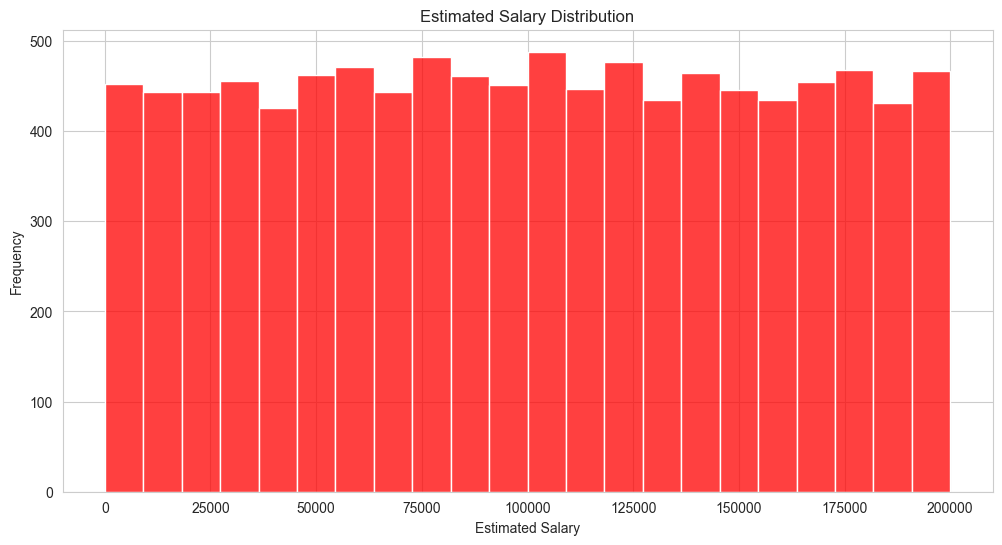

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [28]:
#Tenure distribution
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(df['EstimatedSalary'], color='red')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()
print(df['EstimatedSalary'].describe())

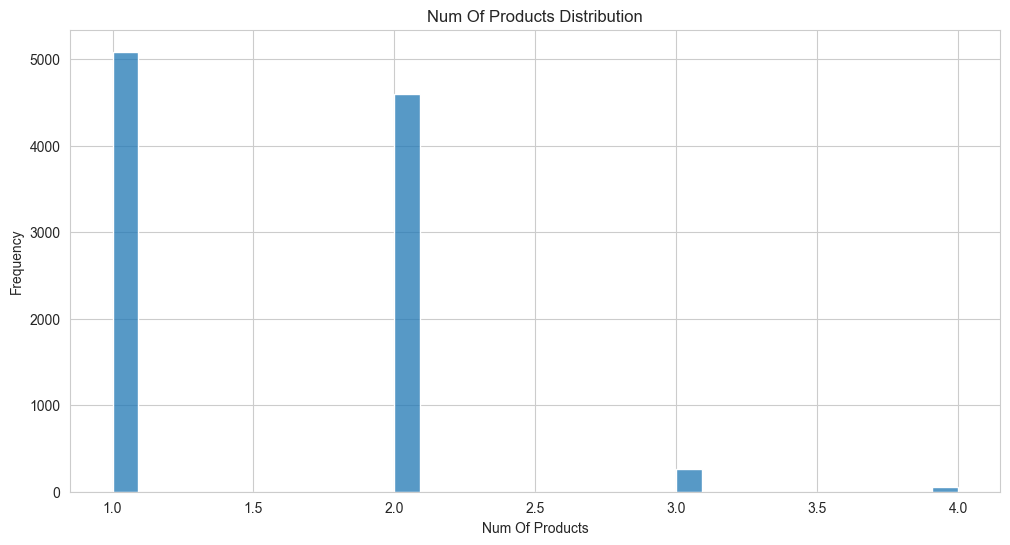

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64


In [29]:
#Tenure distribution
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.histplot(df['NumOfProducts'])
plt.title('Num Of Products Distribution')
plt.xlabel('Num Of Products')
plt.ylabel('Frequency')
plt.show()
print(df['NumOfProducts'].describe())

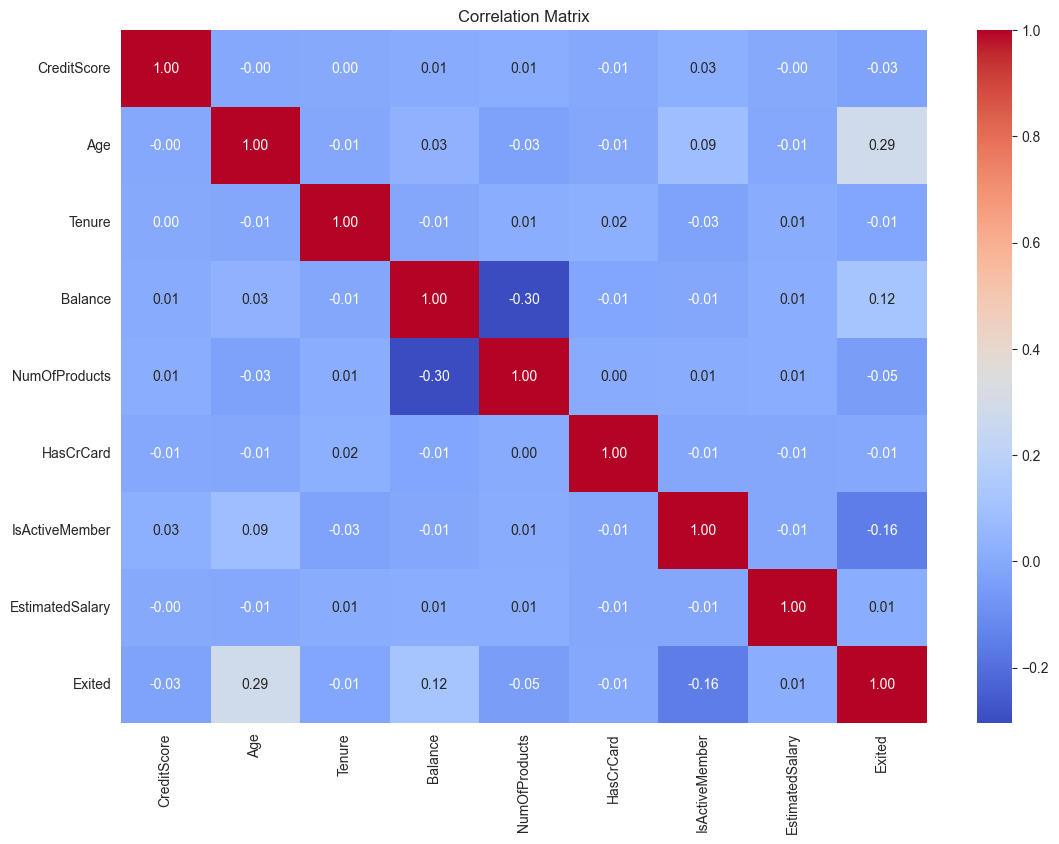

In [30]:
#Correlation matrix for numerical features
plt.figure(figsize=(13, 9))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

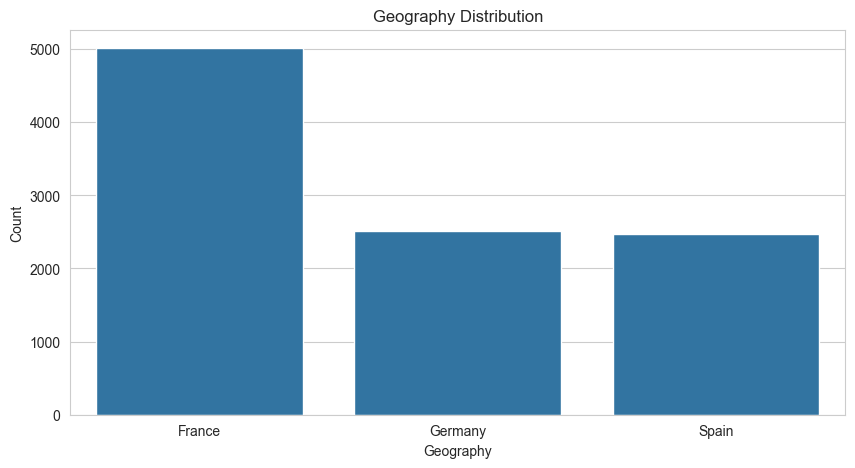

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [31]:
#Visualization of Geography
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Geography', order=df['Geography'].value_counts().index)
plt.title('Geography Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()
print(df['Geography'].value_counts())

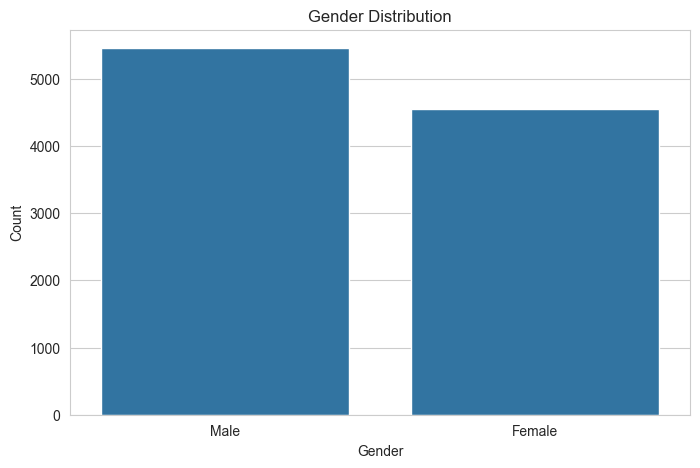

Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [32]:
#Visualization of Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
print(df['Gender'].value_counts())

In [33]:
#Selecting object columns
categorical_df = df[['Geography','Gender']]
#Applying the one-hot encoding
categorical_cols = pd.get_dummies(categorical_df)
#Replacing all boolean columns with 1s and 0s
categorical_cols.replace({True: 1, False: 0}, inplace=True)
#Examining the results
print(categorical_cols.head())
print(categorical_cols.info())

  Geography_France Geography_Germany Geography_Spain Gender_Female Gender_Male
0                1                 0               0             1           0
1                0                 0               1             1           0
2                1                 0               0             1           0
3                1                 0               0             1           0
4                0                 0               1             1           0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Geography_France   10000 non-null  object
 1   Geography_Germany  10000 non-null  object
 2   Geography_Spain    10000 non-null  object
 3   Gender_Female      10000 non-null  object
 4   Gender_Male        10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB
None


In [34]:
# Create the target variable
y = df['Exited']

# Create the independent variables (features) by dropping the target column and other unwanted columns from a copy of the DataFrame
X = df.drop(columns=['Geography', 'Gender', 'Exited'])
 #Concatenate the one-hot encoded columns to the features DataFrame
X = pd.concat([X, categorical_cols], axis=1)
print(X.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary Geography_France Geography_Germany  \
0               1        101348.88                1                 0   
1               1        112542.58                0                 0   
2               0        113931.57                1                 0   
3               0         93826.63                1                 0   
4               1         79084.10                0                 0   

  Geography_Spain Gender_Female Gender_Male  
0               0             1           0  
1               1             1           0  
2             

In [49]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#creating a pipeline for scaling and modeling
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
    ])

#Defining the hyperparameter grid for Logistic Regression
lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter' :[100,200,300]
}

#Setting up GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(lr_pipeline,lr_param_grid,cv=5,n_jobs=1, scoring='accuracy',return_train_score=True)

#Fitting the model
lr_grid_search.fit(X_train, y_train)

#Best hyperparameters
print("Best Hyperparameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best Cross-validation Score for Logistic Regression:", lr_grid_search.best_score_)

# Get the best model from the search (this is the entire fitted pipeline)
best_lr_model = lr_grid_search.best_estimator_

# Make predictions on the test set
y_pred_lr = best_lr_model.predict(X_test)

# Evaluate the model
train_accuracy_lr = accuracy_score(y_train, best_lr_model.predict(X_train))
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Test Set Accuracy for Logistic Regression:", test_accuracy_lr)
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))

Best Hyperparameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l1'}
Best Cross-validation Score for Logistic Regression: 0.811875
Test Set Accuracy for Logistic Regression: 0.8085
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.76      2000

Confusion Matrix for Logistic Regression:
 [[1544   49]
 [ 334   73]]


In [ ]:
# Create an SVM pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

#Define the hyperparameter grid for SVM
param_grid_svm= {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'classifier__kernel': ['rbf']
}

# Set up GridSearchCV for SVM
svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

#Perform the grid search on the training data
svm_grid_search.fit(X_train, y_train)

#Best hyperparameters
print("Best Hyperparameters for Logistic Regression:", svm_grid_search.best_params_)
print("Cross-validation Score for Logistic Regression:", svm_grid_search.best_score_)

# Get the best model from the search (this is the entire fitted pipeline)
best_svm_model = svm_grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the model
train_accuracy_svm = accuracy_score(y_train, best_svm_model.predict(X_train))
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Training Set Accuracy: ", train_accuracy_svm)
print("SVM Test Set Accuracy: ", test_accuracy_svm)
print("Classification Report for Support Vector Machines:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix for Support Vector Machines:\n", confusion_matrix(y_test, y_pred_lr))

Best Hyperparameters for Logistic Regression: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Cross-validation Score for Logistic Regression: 0.8550000000000001
SVM Training Set Accuracy:  0.859
SVM Test Set Accuracy:  0.86
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.76      2000

Confusion Matrix for Logistic Regression:
 [[1544   49]
 [ 334   73]]


In [51]:
#create a decision tree pipeline
dtc_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

#Define the hyperparameter grid for Decision Tree Classifier
param_grid_dtc = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

#Set up GridSearchCV for Decision Tree Classifier
dtc_grid_search = GridSearchCV(
    estimator=dtc_model,
    param_grid=param_grid_dtc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

#Perform the grid search on the training data
dtc_grid_search.fit(X_train, y_train)
#Best hyperparameters
print("Best Hyperparameters for Decision Tree Classifier:", dtc_grid_search.best_params_)
print("Cross-validation Score for Decision Tree Classifier:", dtc_grid_search.best_score_)

# Get the best model from the search (this is the entire fitted pipeline)
best_dtc_model = dtc_grid_search.best_estimator_

# Make predictions on the test set
y_pred_dtc = best_dtc_model.predict(X_test)

# Evaluate the model
train_accuracy_dtc = accuracy_score(y_train, best_dtc_model.predict(X_train))
test_accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Decision Tree Classifier Training Set Accuracy:", train_accuracy_dtc)
print("Test Set Accuracy for Decision Tree Classifier:", test_accuracy_dtc)
print("Classification Report for Decision Tree Classifier:\n", classification_report(y_test, y_pred_dtc))
print("Confusion Matrix for Decision Tree Classifier:\n", confusion_matrix(y_test, y_pred_dtc))

Best Hyperparameters for Decision Tree Classifier: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Cross-validation Score for Decision Tree Classifier: 0.8536250000000001
Decision Tree Classifier Training Set Accuracy: 0.856
Test Set Accuracy for Decision Tree Classifier: 0.858
Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.75      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix for Decision Tree Classifier:
 [[1531   62]
 [ 222  185]]


In [52]:
#create a KNN pipeline
knn_model = Pipeline([
    ('scaler', StandardScaler()),   
    ('classifier', KNeighborsClassifier())
])

#Define the hyperparameter grid for KNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

#Set up GridSearchCV for KNN
knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

#Perform the grid search on the training data
knn_grid_search.fit(X_train, y_train)

#Best hyperparameters
print("Best Hyperparameters for KNN:", knn_grid_search.best_params_)
print("Cross-validation Score for KNN:", knn_grid_search.best_score_)

# Get the best model from the search (this is the entire fitted pipeline)
best_knn_model = knn_grid_search.best_estimator_ 

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test)


# Evaluate the model
train_accuracy_knn = accuracy_score(y_train, best_knn_model.predict(X_train))
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Test Set Accuracy for KNN:", test_accuracy_knn)
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))

Best Hyperparameters for KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
Cross-validation Score for KNN: 0.8307499999999999
Test Set Accuracy for KNN: 0.831
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1593
           1       0.68      0.32      0.43       407

    accuracy                           0.83      2000
   macro avg       0.76      0.64      0.67      2000
weighted avg       0.81      0.83      0.81      2000

Confusion Matrix for KNN:
 [[1533   60]
 [ 278  129]]


In [53]:
#create a random forest pipeline
rfc_model = Pipeline([
    ('scaler', StandardScaler()),   
    ('classifier', RandomForestClassifier())
])  

#Define the hyperparameter grid for Random Forest Classifier
param_grid_rfc = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

#Set up GridSearchCV for Random Forest Classifier
rfc_grid_search = GridSearchCV(
    estimator=rfc_model,
    param_grid=param_grid_rfc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

#Perform the grid search on the training data
rfc_grid_search.fit(X_train, y_train)   

#Best hyperparameters
print("Best Hyperparameters for Random Forest Classifier:", rfc_grid_search.best_params_)
print("Cross-validation Score for Random Forest Classifier:", rfc_grid_search.best_score_)

# Get the best model from the search (this is the entire fitted pipeline)
best_rfc_model = rfc_grid_search.best_estimator_    

# Make predictions on the test set
y_pred_rfc = best_rfc_model.predict(X_test)

# Evaluate the model
train_accuracy_rfc = accuracy_score(y_train, best_rfc_model.predict(X_train))
test_accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Training Set Accuracy for Random Forest Classifier:", train_accuracy_rfc)
print("Test Set Accuracy for Random Forest Classifier:", test_accuracy_rfc)
print("Classification Report for Random Forest Classifier:\n", classification_report(y_test, y_pred_rfc))
print("Confusion Matrix for Random Forest Classifier:\n", confusion_matrix(y_test, y_pred_rfc))

Best Hyperparameters for Random Forest Classifier: {'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Cross-validation Score for Random Forest Classifier: 0.864625
Training Set Accuracy for Random Forest Classifier: 0.928625
Test Set Accuracy for Random Forest Classifier: 0.864
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

Confusion Matrix for Random Forest Classifier:
 [[1542   51]
 [ 221  186]]


In [55]:
#MODEL COMPARISON
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Decision Tree Classifier', 
              'K-Nearest Neighbors','Random Forest Classifier'],
    'Cross Validation Score': [lr_grid_search.best_score_, svm_grid_search.best_score_, dtc_grid_search.best_score_,
                               knn_grid_search.best_score_, rfc_grid_search.best_score_],
    'Training Accuracy': [train_accuracy_lr,train_accuracy_svm, train_accuracy_dtc, train_accuracy_knn, train_accuracy_rfc],
    'Testing Accuracy': [test_accuracy_lr, test_accuracy_svm, test_accuracy_dtc, test_accuracy_knn, test_accuracy_rfc]
})
models.sort_values(by='Testing Accuracy', ascending=False, inplace=True)
print(models)

                      Model  Cross Validation Score  Training Accuracy  \
4  Random Forest Classifier                0.864625           0.928625   
1   Support Vector Machines                0.855000           0.859000   
2  Decision Tree Classifier                0.853625           0.856000   
3       K-Nearest Neighbors                0.830750           1.000000   
0       Logistic Regression                0.811875           0.811000   

   Testing Accuracy  
4            0.8640  
1            0.8600  
2            0.8580  
3            0.8310  
0            0.8085  


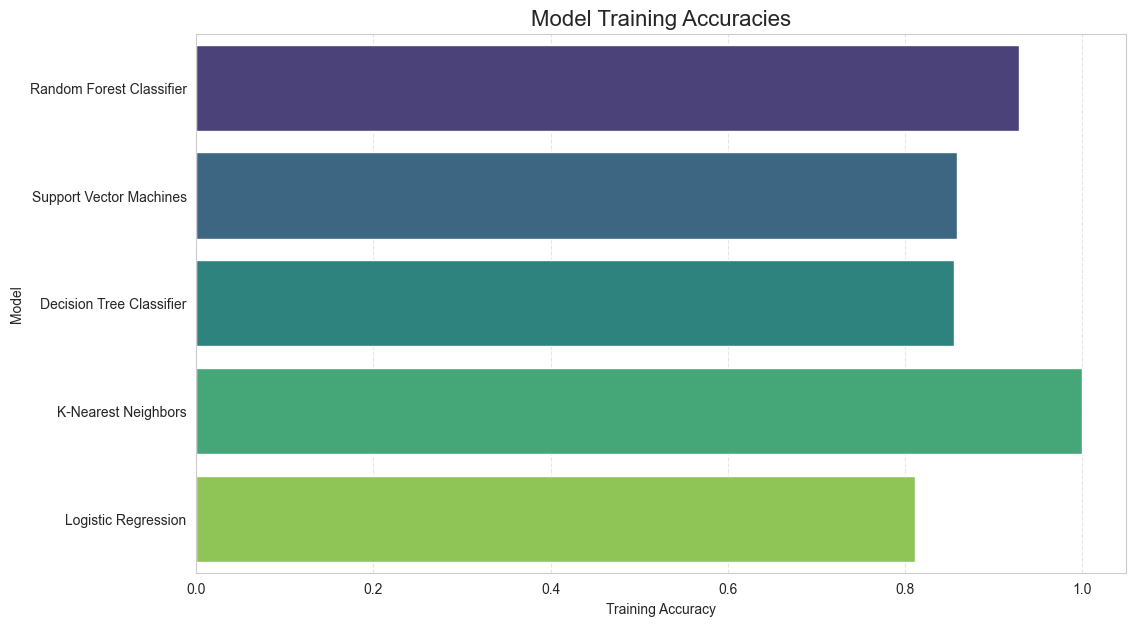

In [58]:
#PLOTTING THE MODEL ACCURACIES
plt.figure(figsize=(12,7))
sns.barplot(x='Training Accuracy', y='Model', data=models, hue='Model', palette='viridis')
plt.title('Model Training Accuracies', fontsize=16)
plt.xlabel('Training Accuracy')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

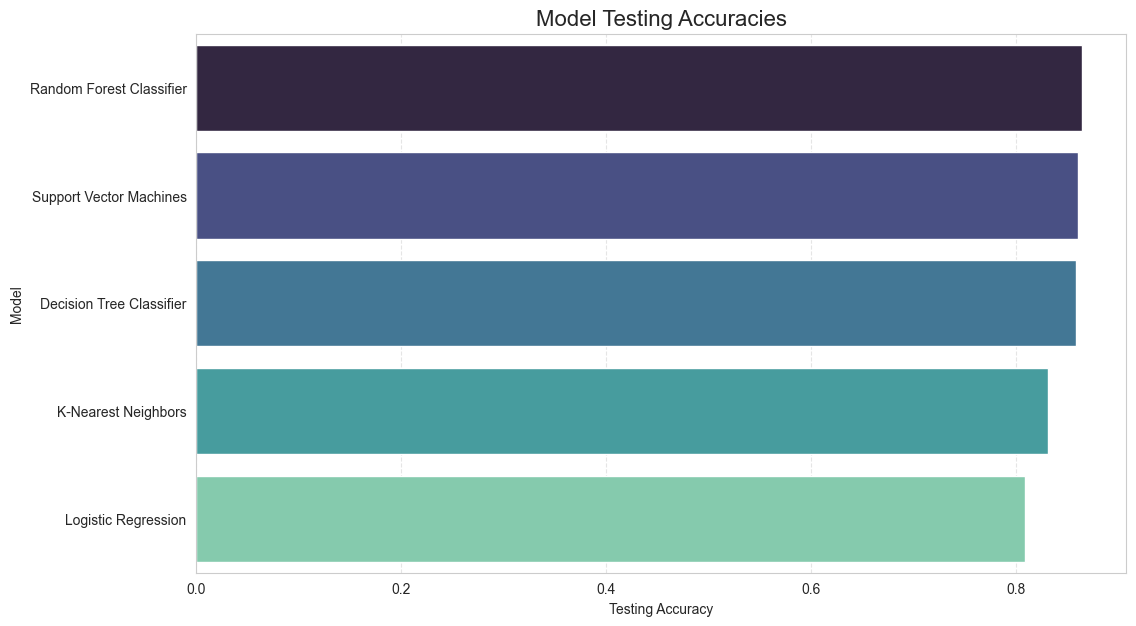

In [63]:
#PLOTTING THE MODEL ACCURACIES
plt.figure(figsize=(12,7))
sns.barplot(x='Testing Accuracy', y='Model', data=models, hue='Model', palette='mako')
plt.title('Model Testing Accuracies', fontsize=16)
plt.xlabel('Testing Accuracy')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

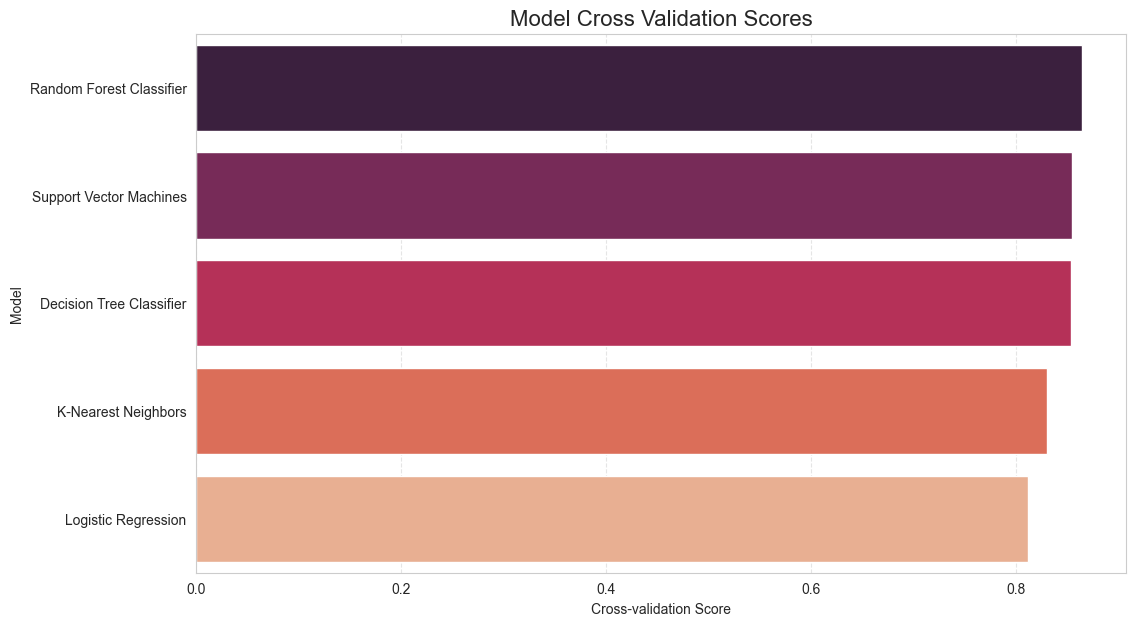

In [61]:
#PLOTTING THE MODEL ACCURACIES
plt.figure(figsize=(12,7))
sns.barplot(x='Cross Validation Score', y='Model', data=models, hue='Model', palette='rocket')
plt.title('Model Cross Validation Scores', fontsize=16)
plt.xlabel('Cross-validation Score')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()